In [1]:
import pandas as pd
import scipy as sp

from abtools.bayesian import ConversionModel

%matplotlib inline

# Generate artificial data

In [ ]:
p = .03
size = 10000
delta_true = .05

y1 = pd.Series(sp.stats.bernoulli.rvs(p=p, size=size, random_state=8228))
y2 = pd.Series(sp.stats.bernoulli.rvs(p=p*(1+delta_true), size=size, random_state=8228))

print('Mean: %.4f, std: %.2f' % (y1.mean(), y1.std()))
print('Mean: %.4f, std: %.2f' % (y2.mean(), y2.std()))
print('y2 больше y1 на %.4f = %d%%' % (y2.mean()- y1.mean(), (y2.mean()/y1.mean()-1)*100))

# Model fitting

In [6]:
model = ConversionModel(y1, y2)

model.fit(n_init=2000, samples=20000)

Average ELBO = -2,956.3: 100%|██████████| 2000/2000 [00:00<00:00, 4742.69it/s]
Finished [100%]: Average ELBO = -2,951.7
100%|██████████| 20000/20000 [00:05<00:00, 3712.29it/s]


# Show results

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f511db09fd0>], dtype=object)

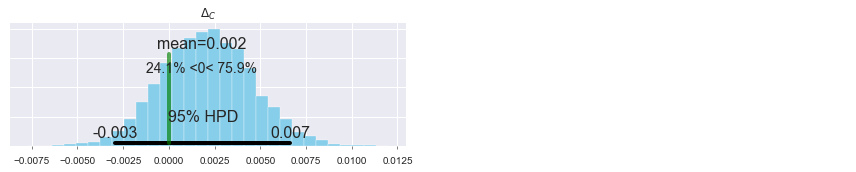

In [7]:
model.plot_deltas(1000)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f511dab0b00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f511d9c9390>], dtype=object)

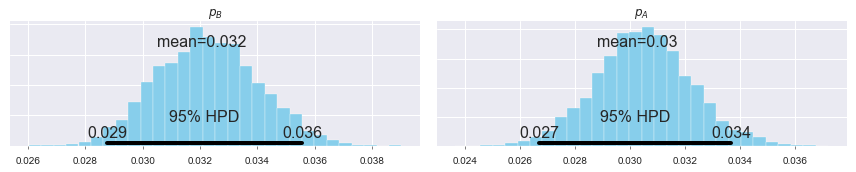

In [8]:
model.plot_params(1000)